<a href="https://colab.research.google.com/github/ohjeonsuk/python-education/blob/main/L230912.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. mysql 접속하기

    mysql -u root -p

    mysql -u root -pzxc098

    mysql -u root testdb -p

#2. DB 보기

    show databases;

#3. DB 사용하기

    use testdb;

testdb = DB 이름

#4. 데이터베이스 생성

    CREATE SCHEMA `testdb` ;


    create database DB이름;

#5. 테이블생성

    CREATE TABLE `testdb`.`users` (`id` INT NOT NULL, PRIMARY KEY (`id`));

    create table users (id INT AUTO_INCREMENT PRIMARY KEY, name VARCHAR(255));

#6. 테이블 목록 보기

    show tables;

#7. 테이블 정보 보기

    describe users;

    desc users;

#8.데이터 넣기

    insert into users values('1', 'Evelyn');


    insert into `keos`.`users` (`id`, `name`) values ('3', 'Tupaki'); # ` : 따옴표가 아님

#9. 데이터 보기

    select * from users;

    select * from users where id=2;

#10. DB, Table 삭제와 비우기

    drop database DB이름

    drop table 테이블이름

    truncate table 테이블이름

#11. 현재 사용자 확인하기

    use mysql;

    select host, user form user;

#12. 사용자 만들기

    create user 'id'@'localhost'; # 로컬에서만 접속 가능


    create user 'id'@'%'; # 외부 접속 가능하게 해주는 host

    
    create urer '사용자ID'@'localhost' indentified by '비밀번호';

    create user '사용자ID'@'192.168.%' indentified by '비밀번호';

## 사용자 삭제하기

    drop user '사용자ID'@'localhost';

#13. 권한 부여 하기

    grant all privileges on testdb.* to 'pmth'@'%'; # testdb 모든 권한 부여

    flush privileges;

## 사용자 생성과 권한부여 동시에 하기

    grant all privileges on *.* to '사용자ID'@'localhost' identified by '비밀번호';

## 특정 테이블에 select, insert 권한 주기

    grant select, insert on DB이름.Table이름 to '사용자ID'@'localhost';

1. 각자 계정 사용,  파일로 하기

2. testdb의 users 비우기 -> 이  결과 보여 주기

3. testdb의 users 삭제 -> 결과 보여 주기

#14. 테이블 변경하기


    alter table users
    change column id customer_id int not null,
    change column name customer_name varchar(45) null default null,
    add column birthday date null after customer_name,
    add column membertype_id tinyint null after birthday,
    rename to customer;

#15. loa_data_file 쿼리 작성

    load data local infile '/Users/kwontaeheon/Documents/mysql/customer.txt'
    into table customer fields terminated by ','
    lines terminated by '\n' ignore 1 lines;

## datetime 데이터가 깨질때

    load data local infile 'C:\\Users\\student\\Documents\\mysql\\productorder.csv'
    into table productorder fields terminated by ',' lines terminated by '\n' ignore 1 lines
    (order_id, customer_id, product_id, quantity, price, @order_time)
    set order_time = str_to_date(@order_time, '%Y-%m-%d %H:%i:%s');

시간 날짜 형식 표기법

https://dev.mysql.com/doc/refman/5.7/en/date-and-time-functions.html#function_date-format

#16. local_infile 설정

    

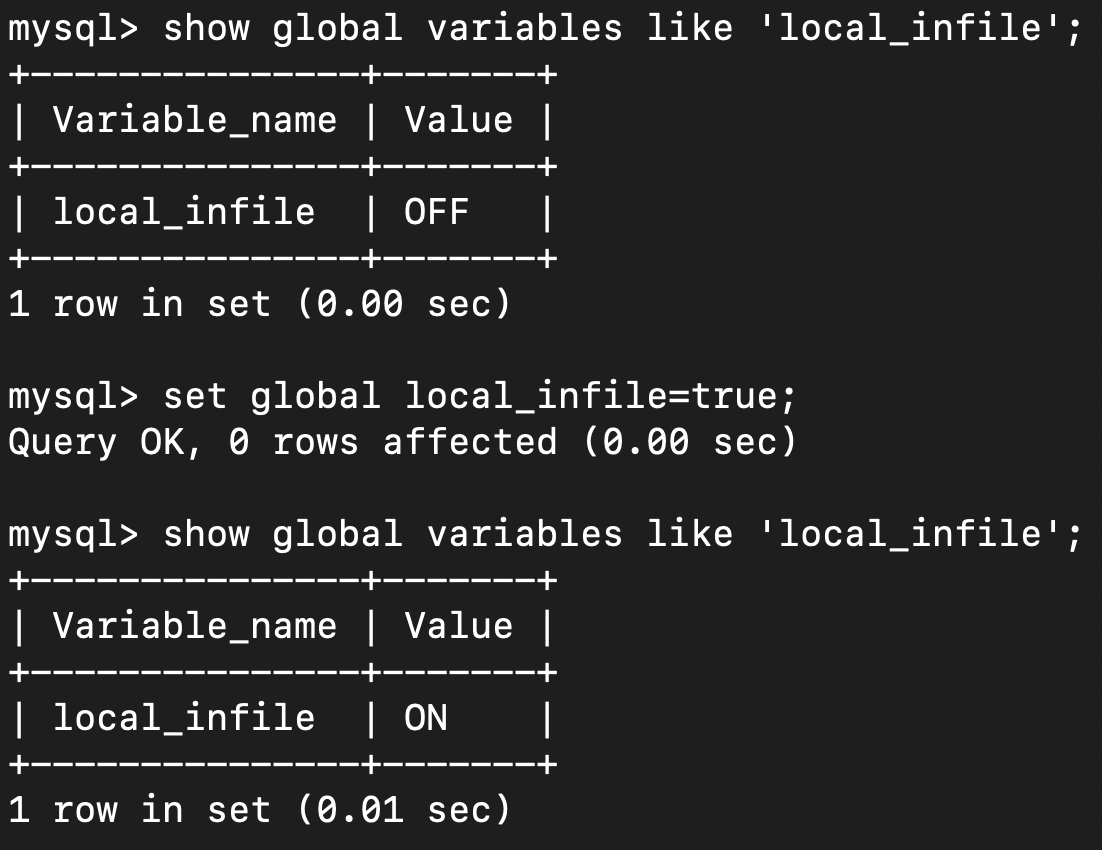

#17. ERROR 2068 해결

    ERROR 2068 (HY000) at line 1: LOAD DATA LOCAL INFILE file request rejected due to restrictions on access.

    해결 방법

    mysql --local_infile -u root keos -p < load_data_file_customer

#18. 기타

## 서버 포트 번호 보기

    show global variables like 'port';

## 테이블 생성 쿼리 보기

    show create table user \G;

1. table 만들기 : mar

2. 데이터 load

3. 데이터 확인

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('./marine.csv')

In [ ]:
df.head()

,Unnamed: 0,식품코드,DB군,식품명,지역 / 제조사,value,nutrients
0,0,N000001,수산물,가다랑어,부산,70.3,수분(g)
1,1,N000004,수산물,가다랑어-레토르트식품(기름담금),"통영,알래스카산",68.6,수분(g)
2,2,N000008,수산물,가다랑어-통조림(기름담금),"통영,알래스카산",64.9,수분(g)
3,3,N000009,수산물,가다랑어-포,"통영,알래스카산",18.0,수분(g)
4,4,N000011,수산물,가라지,여수,81.5,수분(g)


In [ ]:
df.to_csv('pipe_marine.csv', sep='|', index=False)

In [ ]:
!head pipe_marine.csv

Unnamed: 0|식품코드|DB군|식품명|지역 / 제조사|value|nutrients
0|N000001|수산물|가다랑어|부산|70.3|수분(g)
1|N000004|수산물|가다랑어-레토르트식품(기름담금)|통영,알래스카산|68.6|수분(g)
2|N000008|수산물|가다랑어-통조림(기름담금)|통영,알래스카산|64.9|수분(g)
3|N000009|수산물|가다랑어-포|통영,알래스카산|18.0|수분(g)
4|N000011|수산물|가라지|여수|81.5|수분(g)
5|N000012|수산물|가래상어|부산|75.5|수분(g)
6|N000013|수산물|가무락조개|부산|79.9|수분(g)
7|N000014|수산물|가물치|대전|79.6|수분(g)
8|N000016|수산물|가시망둑|부산|75.4|수분(g)
